In [10]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [11]:
df = pd.read_csv('projekti2.csv').head(10000)
df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
9995,9995,b'-2393099149039893833',b'2020-06-29 10:19:16.417545+00:00',1301,-120,100,0
9996,9996,b'-2393099149039893833',b'2020-06-29 10:19:25.417615+00:00',1301,-119,100,0
9997,9997,b'-2393099149039893833',b'2020-06-29 10:19:35.417986+00:00',1305,-112,100,0
9998,9998,b'-2393099149039893833',b'2020-06-29 10:19:45.417841+00:00',1305,-112,100,0


Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 2549
uniques in y 2778
uniques in z 1
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100]
uniques in q [0]
------------------------------
Number of nodes: 1
------------------------------
Outliers

Data with outliers:  10000
Ouliers removed:     152
Data after:  9848


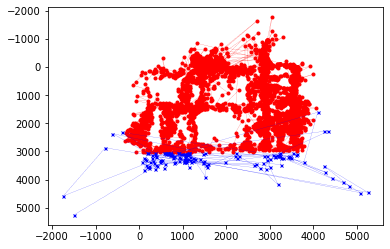

In [12]:
df = find_outliers(df)

In [13]:
df =  clean_dataframe(df)

In [14]:
df


,index,Unnamed: 0,node_id,timestamp,x,y
0,0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...,...,...
9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120
9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119
9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112
9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112


In [15]:
df = df.reset_index()
df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...,...,...,...
9623,9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120
9624,9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119
9625,9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112
9626,9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112


In [73]:
df['seconds'] = df.timestamp.dt.second
df['difference'] = df.seconds.diff()

df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y,seconds,difference
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257,8,NaN
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344,8,0.0
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344,9,1.0
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254,9,0.0
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188,10,1.0
...,...,...,...,...,...,...,...,...,...
9623,9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120,16,10.0
9624,9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119,25,9.0
9625,9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112,35,10.0
9626,9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112,45,10.0


In [77]:
df = df.sort_values(by='timestamp', ascending=True)
df

,level_0,index,Unnamed: 0,node_id,timestamp,x,y,seconds,difference
0,0,0,0,1,2020-06-24 15:20:08.533,2762,-257,8,NaN
1,1,1,1,1,2020-06-24 15:20:08.620,2870,-344,8,0.0
2,2,2,2,1,2020-06-24 15:20:09.623,2916,-344,9,1.0
3,3,3,3,1,2020-06-24 15:20:09.623,2894,-254,9,0.0
4,4,4,4,1,2020-06-24 15:20:10.116,2888,-188,10,1.0
...,...,...,...,...,...,...,...,...,...
9623,9623,9995,9995,1,2020-06-29 13:19:16.418,1301,-120,16,10.0
9624,9624,9996,9996,1,2020-06-29 13:19:25.418,1301,-119,25,9.0
9625,9625,9997,9997,1,2020-06-29 13:19:35.418,1305,-112,35,10.0
9626,9626,9998,9998,1,2020-06-29 13:19:45.418,1305,-112,45,10.0


In [ ]:
-

In [56]:
onesec = []
moresec = []
nolla = []
index = 0
for i in df.seconds:
    
    if index > 0:
        if  i - df.loc[index-1].seconds == 1:
            onesec.append(1)
        elif i- df.loc[index-1].seconds == 0:
            nolla.append(1)
        else:
            moresec.append(1)
    index += 1
    
print(len(onesec))
print(len(moresec))
print(len(nolla))

        

2341
6011
1275


In [31]:
print(len(onesec)+len(moresec)+len(nolla))

9627


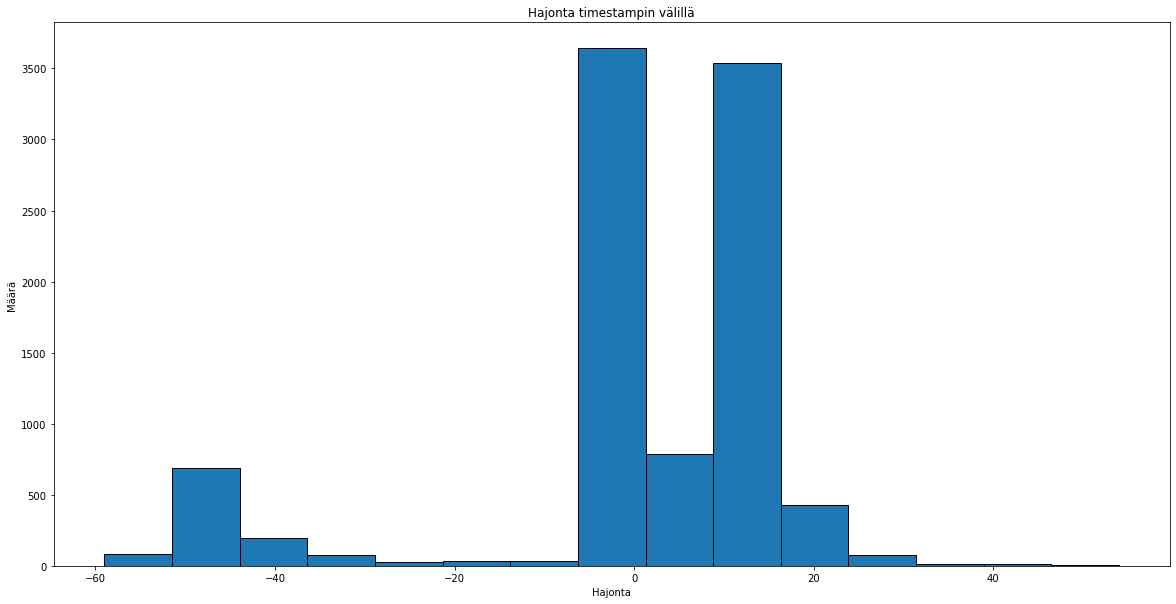

In [89]:
plt.figure(figsize=(20,10))
plt.sca(df['difference'], bins = 15, edgecolor='black')
plt.title('Hajonta timestampin välillä')
plt.xlabel('Hajonta')
plt.ylabel('Määrä')
plt.show()

